# 🚖 Exploratory Data Analysis of Uber Trips in NYC (Jan–Feb 2015)

- Author: CHERUKU POOJA
- Internship Organization: UNIFIED MENTOR
- Internship Role: Data Analyst Intern
- Project Duration: 20-MAR-2025 TO 19-APR-2025

This project analyzes Uber daily summary data from January and February 2015.
Each record represents aggregate data for trips and vehicles from various Uber bases in NYC.

Objectives:
- Explore trends in Uber usage over time
- Understand base-wise and weekday-wise trip activity
- Generate visual insights to assist business decision-making

## 1. Import Libraries & Load Dataset

In [2]:
# 1.Import Libraries & Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# Set plot style
sns.set(style='whitegrid')

In [4]:
# Load dataset
df = pd.read_csv(r'C:\Users\chpoo\Downloads\Uber-Jan-Feb-FOIL.csv')

In [5]:
# Preview data
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (354, 4)


,dispatching_base_number,date,active_vehicles,trips
0,B02512,1/1/2015,190,1132
1,B02765,1/1/2015,225,1765
2,B02764,1/1/2015,3427,29421
3,B02682,1/1/2015,945,7679
4,B02617,1/1/2015,1228,9537


## 2. Data Cleaning

In [6]:
# 2. Data Cleaning
# Rename columns if needed
df.columns = df.columns.str.strip().str.lower()

In [7]:
# Convert date column to datetime
df['date'] = pd.to_datetime(df['date'])

In [8]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

Missing values:
 dispatching_base_number    0
date                       0
active_vehicles            0
trips                      0
dtype: int64


In [9]:
# Summary data types
print("\nData types:\n", df.dtypes)


Data types:
 dispatching_base_number            object
date                       datetime64[ns]
active_vehicles                     int64
trips                               int64
dtype: object


In [ ]:
 # Insight:
 #Dataset has clean column names and proper datetime formatting, with no missing values detected.

## 3. Basic Summary

In [10]:
# 3.Basic Summary
print("\nUnique bases:", df['dispatching_base_number'].nunique())
print("Total trips:", df['trips'].sum())
print("Total active vehicles:", df['active_vehicles'].sum())
print("\nDescriptive statistics:\n", df.describe())


Unique bases: 6
Total trips: 4130230
Total active vehicles: 462832

Descriptive statistics:
                       date  active_vehicles         trips
count                  354       354.000000    354.000000
mean   2015-01-30 00:00:00      1307.435028  11667.316384
min    2015-01-01 00:00:00       112.000000    629.000000
25%    2015-01-15 00:00:00       296.750000   2408.500000
50%    2015-01-30 00:00:00      1077.000000   9601.000000
75%    2015-02-14 00:00:00      1417.000000  13711.250000
max    2015-02-28 00:00:00      4395.000000  45858.000000
std                    NaN      1162.510626  10648.284865


In [6]:
# Insight:
# There are 6 unique dispatch bases, with over 4.1 million trips and  active vehicle-days 462832 recorded in total.

## 4. Daily Trend Analysis

In [11]:
# 4.Daily Trend Analysis
daily_summary = df.groupby('date').sum().reset_index()

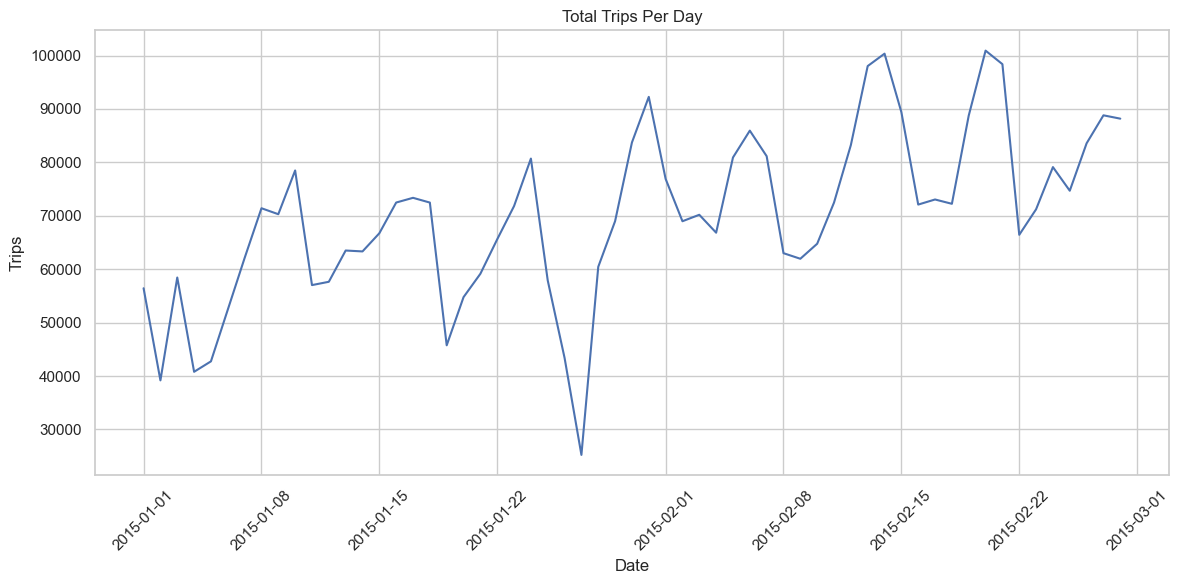

In [12]:
plt.figure(figsize=(12,6))
plt.plot(daily_summary['date'], daily_summary['trips'], label='Trips')
plt.title('Total Trips Per Day')
plt.xlabel('Date')
plt.ylabel('Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
#Insight: 
#Daily Uber trips show a steady increase from January to February, with occasional dips likely due to weekends or special events. 
#This indicates growing demand for rides over time.

## 5. Weekday Analysis

In [15]:
# 5.Weekday Analysis
df['weekday'] = df['date'].dt.day_name()
weekday_summary = df.groupby('weekday')[['trips']].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

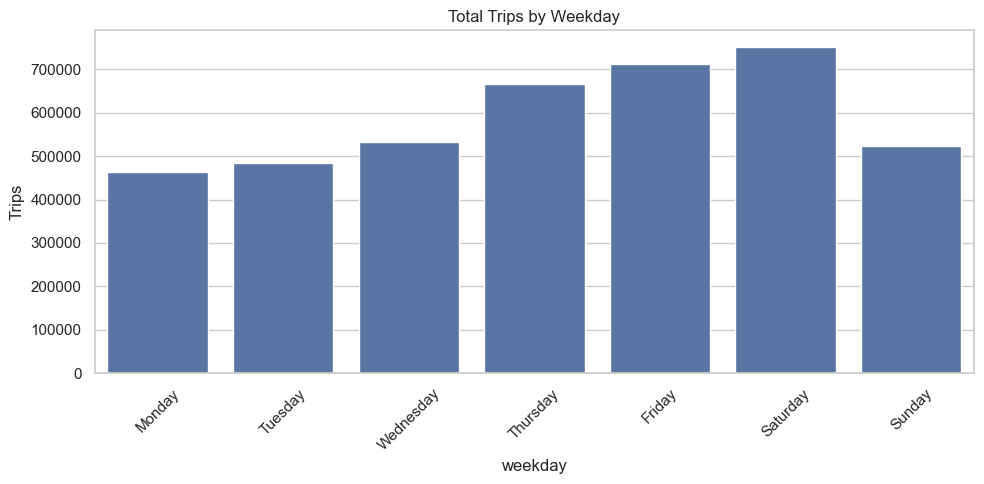

In [16]:
plt.figure(figsize=(10,5))
sns.barplot(x=weekday_summary.index, y=weekday_summary['trips'])
plt.title('Total Trips by Weekday')
plt.ylabel('Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [4]:
#Insight:
#Uber trips peak on Saturday and Friday, suggesting high weekend and late-week activity,
#while Monday sees the fewest rides—highlighting less demand at the start of the week.

## 6. Base-wise Comparison

In [17]:
# 6.Base-wise Comparison
base_summary = df.groupby('dispatching_base_number')[['trips']].sum().sort_values(by='trips', ascending=False)


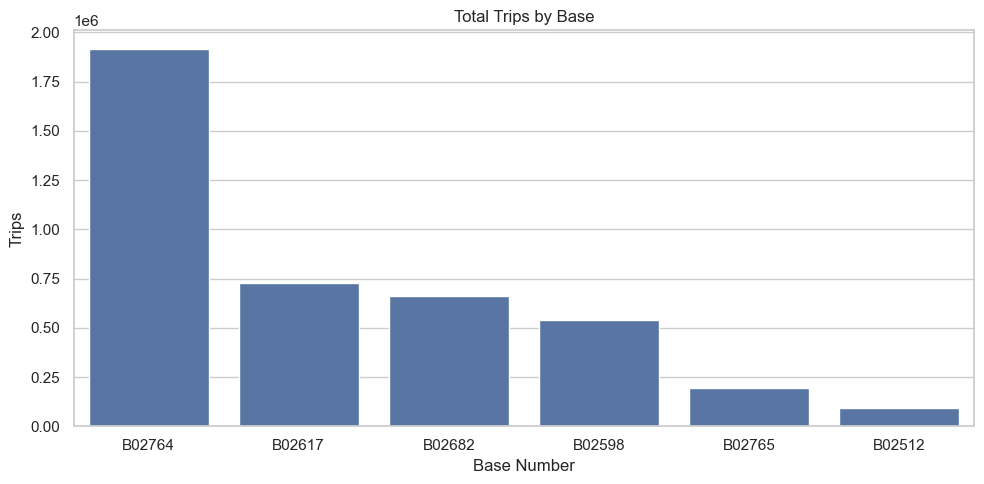

In [18]:
plt.figure(figsize=(10,5))
sns.barplot(x=base_summary.index, y=base_summary['trips'])
plt.title('Total Trips by Base')
plt.ylabel('Trips')
plt.xlabel('Base Number')
plt.tight_layout()
plt.show()

In [3]:
#Insight:  
#Base B02764 dominates trip volume, indicating it's the busiest and most relied-upon dispatch center during this period.

## 7. Heatmap of Activity

In [21]:
# 7. Heatmap of Activity
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month_name()
pivot = df.pivot_table(index='weekday', columns='day', values='trips', aggfunc='sum')

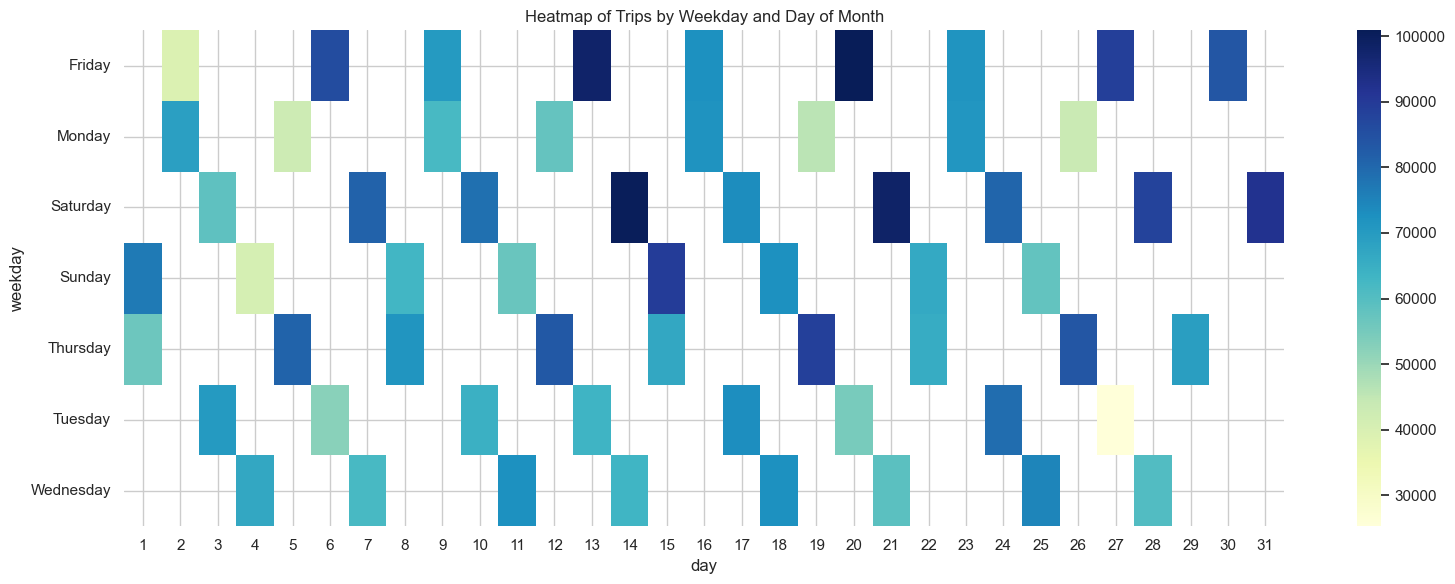

In [22]:
plt.figure(figsize=(16,6))
sns.heatmap(pivot, cmap='YlGnBu')
plt.title('Heatmap of Trips by Weekday and Day of Month')
plt.tight_layout()
plt.show()

In [2]:
#Insight: 
#Trip activity peaks mid-week, with noticeable spikes on **Thursdays and Fridays**, suggesting increased pre-weekend demand.

## 8. Monthly Comparison

In [23]:
# 8. 📆 Monthly Comparison
monthly_summary = df.groupby(df['date'].dt.month_name())[ ['trips', 'active_vehicles'] ].sum()

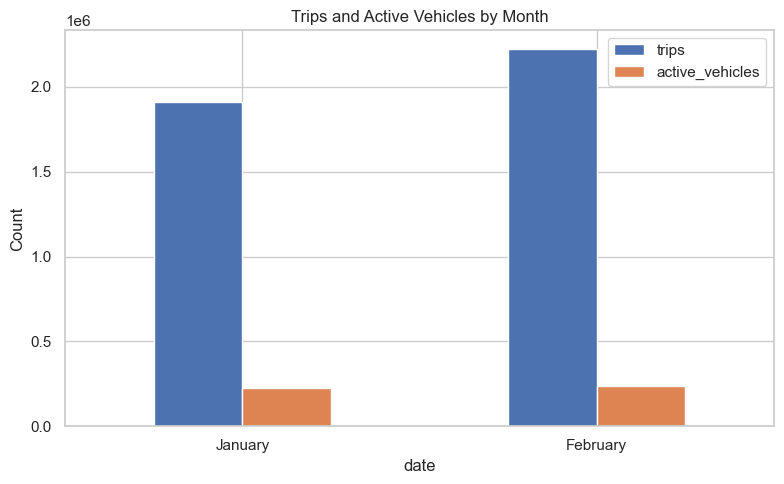

In [24]:
monthly_summary = monthly_summary.reindex(['January', 'February'])
monthly_summary[['trips', 'active_vehicles']].plot(kind='bar', figsize=(8,5))
plt.title('Trips and Active Vehicles by Month')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [1]:
#Insight:
#February shows a slight rise in both trips and active vehicles compared to January, indicating growing demand.


# 9. Overall Insights
- Trip activity shows a steady upward trend, with peaks mid-week and on weekends—especially Saturdays.
 - The base B02764 dominates operations with the highest trip count. 
 - Activity also increased slightly in February, both in trips and active vehicles.
 - suggesting growing demand and engagement across the board.


# 10. Conclusion

This exploratory analysis highlights key operational trends in Uber's NYC service in early 2015.
Future steps could include:
- Extending analysis to more months
- Analyzing weather or event impact
- Integrating fare or location-based data

This notebook serves as a foundation for real-world data exploration and visualization in an analytics role.
